#  June 2 (task 1) — Intro to Text Representations in NLP

In this notebook, we'll explore foundational methods for representing text data in numerical form so that it can be fed into machine learning models.

## 🔍 Topics:
- One-Hot Encoding
- Bag of Words (BoW) using `CountVectorizer`
- Tokenization and feature matrix generation


## 🔡 One-Hot Encoding

One-hot encoding represents each word in the vocabulary as a binary vector. Each vector has a `1` at the position of that word and `0` elsewhere.

It is:
- Simple and intuitive
- But doesn't capture relationships between words
- Memory inefficient for large vocabularies

### Example:
Vocabulary: ["apple", "banana", "cat"]

- "apple" → [1, 0, 0]  
- "banana" → [0, 1, 0]  
- "cat" → [0, 0, 1]


In [1]:
import numpy as np

# Define a small vocabulary
vocab = ["apple", "banana", "cat"]
word_to_index = {word: idx for idx, word in enumerate(vocab)}

# Function to one-hot encode a word
def one_hot_encode(word, vocab_size=len(vocab)):
    vec = np.zeros(vocab_size)
    if word in word_to_index:
        vec[word_to_index[word]] = 1
    return vec

# Encode
print("One-hot for 'banana':", one_hot_encode("banana"))


One-hot for 'banana': [0. 1. 0.]


## 🧺 Bag of Words (BoW)

BoW represents a text as a **frequency vector**: how many times each word from the vocabulary appears in a document.

Unlike one-hot, BoW:
- Handles multi-word inputs (e.g., whole sentences)
- Still doesn't capture word order or meaning
- Used commonly in text classification tasks

BoW is implemented using tools like `CountVectorizer` in `scikit-learn`.


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
docs = [
    "the cat sat on the mat",
    "the dog sat on the log",
    "the cat chased the mouse"
]

# Create CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform
X = vectorizer.fit_transform(docs)

# View vocabulary
print("Vocabulary:", vectorizer.vocabulary_)

# Convert to dense array
print("\nDocument-Term Matrix:\n", X.toarray())


Vocabulary: {'the': 8, 'cat': 0, 'sat': 7, 'on': 6, 'mat': 4, 'dog': 2, 'log': 3, 'chased': 1, 'mouse': 5}

Document-Term Matrix:
 [[1 0 0 0 1 0 1 1 2]
 [0 0 1 1 0 0 1 1 2]
 [1 1 0 0 0 1 0 0 2]]


## 📊 Feature Matrix

Each row in the matrix corresponds to a document.
Each column corresponds to a word in the vocabulary.
The value at `(i, j)` is the **count of word `j` in document `i`**.

> For example: If "cat" appears twice in doc 1, then matrix[0][cat_index] = 2

This is a **sparse**, **high-dimensional** representation of text.


In [3]:
import pandas as pd

# Show as DataFrame for clarity
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df.index = ["Doc1", "Doc2", "Doc3"]
df


,cat,chased,dog,log,mat,mouse,on,sat,the
Doc1,1,0,0,0,1,0,1,1,2
Doc2,0,0,1,1,0,0,1,1,2
Doc3,1,1,0,0,0,1,0,0,2


## ✅ Summary

- One-hot encoding is simple but not practical for larger corpora.
- Bag of Words creates a document-term matrix using word counts.
- Both are **sparse**, **non-contextual** encodings.



# 🎓 (task 2) Training Large Language Models: Prompting, Fine-Tuning, and RLHF

This notebook summarizes Jesse Mu’s lecture on how modern language models are trained and aligned for real-world interactions, such as in ChatGPT, Bing, and other LLMs.

We'll explore:
- Prompting (zero-shot, few-shot)
- Instruction fine-tuning
- RLHF (Reinforcement Learning from Human Feedback)


## 🧠 1. What Are Language Models?

Large Language Models (LLMs) are trained on vast datasets to predict the **next word** in a sequence. Over time, this simple task leads to learning complex language structures and world knowledge.

- They behave as **implicit world models**, absorbing facts, reasoning patterns, and user intent from raw text.
- This makes them capable of **text generation**, **translation**, **summarization**, and more.


## 🪄 2. Prompting: Zero-shot and Few-shot Learning

### 🔹 Zero-shot:
You ask the model a question directly, with no examples.
> E.g., *"Translate this to French: 'I am happy'"*

### 🔹 Few-shot:
You give the model a few labeled examples in the prompt.
> E.g.,
Translate English to French:

I am happy → Je suis content

How are you → Comment ça va

I love cats → J'aime les chats


Then you add your query.

This approach emerged with GPT-2 and GPT-3, showing that **training on many tasks enables multitask inference**, even without explicit supervision.


In [4]:
# Simulating few-shot prompting logic
prompt = """Translate English to French:
- I am happy → Je suis content
- How are you → Comment ça va
- I love cats → J'aime les chats
- I am tired →"""

print(prompt)


Translate English to French:
- I am happy → Je suis content
- How are you → Comment ça va
- I love cats → J'aime les chats
- I am tired →


## 📋 3. Instruction Fine-Tuning

Prompting alone isn’t always reliable. So we fine-tune models on datasets like:
- **Super-NaturalInstructions** – millions of (instruction, input, output) triplets

Fine-tuning the model to follow instructions helps align it with **human intent**.
This forms the basis of models like:
- `text-davinci-003` (InstructGPT)
- ChatGPT

**Before fine-tuning:**
> *"Translate the following"* might yield arbitrary completions.

**After fine-tuning:**
> The model understands it's expected to produce structured, helpful, task-specific outputs.


## 🏆 4. RLHF: Reinforcement Learning from Human Feedback

Even fine-tuned models might give unhelpful or verbose answers. RLHF improves this further by:

1. Collecting human preference data (Which of 2 outputs is better?)
2. Training a **reward model** to predict human preferences
3. Using **reinforcement learning (e.g., PPO)** to update the language model

This trains the model not just to be correct, but to be **helpful, safe, and aligned**.

### Key idea:
- Instead of just "next word prediction", the model is rewarded for **satisfying the user**.


## 🚧 5. Challenges Ahead

Despite instruction tuning and RLHF, major issues remain:
- **Hallucination**: The model confidently generates false information.
- **Over-optimization**: Trained too hard to please the reward model → less creativity or truthfulness.
- **Human Feedback is Costly**: Needs scalable and reliable alternatives.

### 🔮 Future Focus:
- AI-assisted feedback systems
- Better evaluation benchmarks
- Controlling bias, toxicity, and truthfulness


## ✅ Summary

| Technique                | Goal                                      |
|--------------------------|-------------------------------------------|
| **Prompting**            | Task inference without further training   |
| **Instruction Tuning**   | Teach the model to follow natural commands |
| **RLHF**                 | Optimize model to align with human intent |

Together, these stages evolve LLMs from basic predictors into **safe, helpful assistants** like ChatGPT.

> This layered training strategy is critical for making models usable in real-world applications.


# JUNE 3 (task 1): Video Lecture Summary

# 📝 Natural Language Generation (NLG) – Lecture Summary

- What is NLG?
- Applications in real-world tasks
- Decoding methods (e.g., greedy, beam search)
- Training strategies (MLE, reinforcement learning)
- Evaluation metrics (BLEU, ROUGE, MAUVE)
- Ethical concerns and future directions


## 🧠 What is NLG?

**Natural Language Generation (NLG)** is the process of producing fluent, coherent, human-like text from input data.

This contrasts with **Natural Language Understanding (NLU)**, which interprets or extracts meaning from text.

### 🔍 Examples of NLG:
- Machine translation (e.g., English → French)
- Chatbots (e.g., Siri, ChatGPT)
- Text summarization
- Creative writing / story generation
- Visual descriptions from images (captioning)
- Structured data → text (e.g., weather reports)


## 🔁 Autoregressive Models

Most NLG systems use **autoregressive models**:
- Text is generated **token by token**
- Each token depends on all previous ones

### Examples:
- GPT, GPT-2/3/4
- Transformer decoder-only models


In [5]:
#Basic Autoregressive Generation with GPT2

from transformers import pipeline, set_seed

generator = pipeline("text-generation", model="gpt2")
set_seed(42)

output = generator("Once upon a time in Paris,", max_length=30, num_return_sequences=1)
print(output[0]["generated_text"])


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Once upon a time in Paris, I would have a conversation with Charles de Gaulle about what he thought of my new book, and it would be like a conversation with someone who is an American, and who has just made me a new book. I was really glad that his book was being written after all those years. I think it was a huge mistake to put a book out before I was able to understand what he was thinking.

We have a lot of great American writers, but we have a lot of French writers who are writing about the French. Most of them are American writers, but there are probably a few who are writing about the French, too.

Did you ever want to be a novelist?

Yes, I had a very good time writing novels in the States. My family was in the country and I was a very good writer. I loved reading books and then writing. I wrote a lot of novels in the States, I think, though I was always in the dark about the books my parents were writing. My father was a big fan of mine, and I had a very good opinion of him. I

## 📤 Decoding Techniques

How the next word is picked during generation greatly affects quality:

### 🔹 1. Greedy Decoding
- Always picks the highest-probability word
- Fast but repetitive or bland

### 🔹 2. Beam Search
- Keeps top *k* best sequences at each step
- More balanced but can still be repetitive

### 🔹 3. Sampling
- Picks next word based on probability distribution (e.g., top-k, top-p)
- Enables diversity and creativity

### 🔹 4. Repetition Issues
Even advanced models (GPT, LSTMs) can repeat phrases without additional constraints.


In [6]:
#Top-k Sampling

output = generator(
    "The future of AI in healthcare is", 
    max_length=50, 
    do_sample=True, 
    top_k=50
)
print(output[0]["generated_text"])


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


The future of AI in healthcare is uncertain, but we're seeing it thrive in emerging markets. As we continue to see more and more startups seeking to start out in healthcare, healthcare is becoming more accessible to them. Companies like Google, Google+ and Facebook are bringing healthcare technologies in a new direction, and it will be interesting to see how this is accomplished.

This article was originally published on The Conversation. Read the original article.


## 🏋️ Training Strategies

### 🔸 Maximum Likelihood Estimation (MLE)
- Trains model to maximize probability of correct next token.
- Suffers from **exposure bias** (only sees correct context during training).

### 🔸 Scheduled Sampling
- Mixes predicted tokens with ground truth during training to improve robustness.

### 🔸 DAgger (Dataset Aggregation)
- Uses feedback from predictions to improve training dynamically.

### 🔸 Reinforcement Learning
- Optimizes for long-term rewards like human satisfaction (e.g., using RLHF).


## 📏 Evaluation Methods

NLG evaluation is hard! It must consider:
- Fluency
- Factual correctness
- Coherence
- Relevance

### Common Metrics:
| Metric | Purpose |
|--------|---------|
| **BLEU** | Word/phrase overlap (used in MT) |
| **ROUGE** | Recall-oriented overlap (used in summarization) |
| **BERTScore** | Uses contextual embeddings |
| **MAUVE** | KL-divergence + embedding similarity for open-ended tasks |

### Human Evaluation:
Still the gold standard. Includes fluency, coherence, factuality.


In [7]:
#Example BLEU Score

from nltk.translate.bleu_score import sentence_bleu

reference = [["the", "cat", "is", "on", "the", "mat"]]
candidate = ["the", "cat", "sat", "on", "the", "mat"]

print("BLEU Score:", sentence_bleu(reference, candidate))


BLEU Score: 7.262123179505913e-78


C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


## ⚠️ Ethical Considerations

Large-scale NLG models introduce risks:

- **Hallucinations**: Making up facts confidently
- **Toxicity/Bias**: Reflecting societal or dataset bias
- **Misuse**: Fake news, spam generation
- **Adversarial Attacks**: Fooling models into generating harmful content

### 🔐 Mitigations:
- Filter training data
- Use reinforcement learning with human feedback (RLHF)
- Add guardrails and detection mechanisms


# JUNE 3 (task 2): TF-IDF Vectorization

## What is TF-IDF?
TF-IDF stands for Term Frequency-Inverse Document Frequency, a numerical statistic used to evaluate how important a word is to a document in a collection.

It helps balance word frequency in a document against how common or rare the word is across all documents.

 ## Why use it?
Common words like “the”, “is”, and “on” may appear frequently, but they carry low information.

TF-IDF down-weights frequent/common words and up-weights words that are rare but significant in a specific document.



In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

corpus = [
    "the cat sat on the mat",
    "the dog sat on the log",
    "dogs and cats are great pets"
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df


,and,are,cat,cats,dog,dogs,great,log,mat,on,pets,sat,the
0,0.000000,0.000000,0.427554,0.000000,0.000000,0.000000,0.000000,0.000000,0.427554,0.325166,0.000000,0.325166,0.650331
1,0.000000,0.000000,0.000000,0.000000,0.427554,0.000000,0.000000,0.427554,0.000000,0.325166,0.000000,0.325166,0.650331
2,0.408248,0.408248,0.000000,0.408248,0.000000,0.408248,0.408248,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000


 ## What does this tell us?
Each number in the table is the TF-IDF score of a word in a document.

Words that are frequent but appear across all documents (e.g. "the") will have low scores.

# JUNE 4: Compare BoW vs TF-IDF

 ## Bag of Words (BoW)
BoW simply counts how many times each word appears in the document. It doesn’t care about meaning, order, or context.

Pros: Simple, fast

Cons: Doesn’t distinguish between important and common words

## TF-IDF
TF-IDF improves BoW by weighing rare words more heavily, assuming rare words are more meaningful in identifying the document.



In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(corpus)

# Sparsity comparison
print(f"BoW sparsity: {(X_bow == 0).sum() / X_bow.size:.2f}")
print(f"TF-IDF sparsity: {(X == 0).sum() / X.size:.2f}")


BoW sparsity: 1.44
TF-IDF sparsity: 1.44


C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3577: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


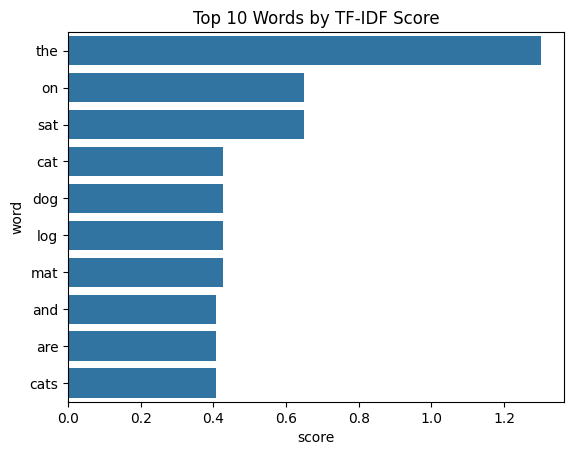

In [10]:
import numpy as np
import seaborn as sns

# Sum TF-IDF scores for each word across all docs
word_scores = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

# Create DataFrame
tfidf_df = pd.DataFrame({'word': words, 'score': word_scores})
top_words = tfidf_df.sort_values(by="score", ascending=False).head(10)

# Plot
sns.barplot(x='score', y='word', data=top_words)
plt.title("Top 10 Words by TF-IDF Score")
plt.show()


# JUNE 5: Intro to Word Embeddings

## What are Word Embeddings?
Word embeddings represent words as dense vectors in continuous space, where similar words are closer together.

### Examples:

vector("king") - vector("man") + vector("woman") ≈ vector("queen")

vector("apple") is close to vector("banana"), far from vector("car")

## Why not use TF-IDF?
TF-IDF is sparse and treats each word as independent (bag of words).

It doesn’t capture meaning or relationships.

Word embeddings solve this by learning contextual similarity.

##  Word2Vec vs GloVe
| Feature    | Word2Vec              | GloVe                            |
| ---------- | --------------------- | -------------------------------- |
| Trained on | Local context windows | Global word co-occurrence matrix |
| Output     | Word vectors          | Word vectors                     |
| Library    | gensim                | gensim / Stanford's original C   |


In [11]:
#Load GloVe Pretrained Vectors

import gensim.downloader as api

glove_model = api.load("glove-wiki-gigaword-50")  # 50-dimensional


In [12]:
#Explore Word Similarity

# Vector
print("Vector for 'dog':", glove_model['dog'][:5])

# Cosine similarity
print("Similarity (dog vs cat):", glove_model.similarity('dog', 'cat'))
print("Similarity (dog vs banana):", glove_model.similarity('dog', 'banana'))


Vector for 'dog': [ 0.11008 -0.38781 -0.57615 -0.27714  0.70521]
Similarity (dog vs cat): 0.9218005
Similarity (dog vs banana): 0.3334643


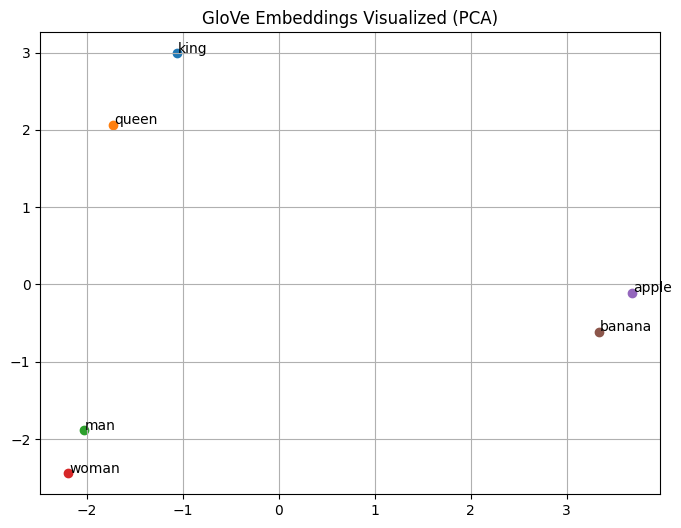

In [13]:
#  Visualize Word Embeddings

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ['king', 'queen', 'man', 'woman', 'apple', 'banana']
vectors = [glove_model[word] for word in words]

pca = PCA(n_components=2)
components = pca.fit_transform(vectors)

plt.figure(figsize=(8,6))
for i, word in enumerate(words):
    plt.scatter(*components[i])
    plt.text(components[i][0]+0.01, components[i][1]+0.01, word)
plt.title("GloVe Embeddings Visualized (PCA)")
plt.grid(True)
plt.show()


#  June 6 – Word Similarity Experiments

## 🧠 Word Vector Arithmetic and Analogy Tasks

One of the most fascinating capabilities of word embeddings (like Word2Vec, GloVe) is their ability to capture **semantic relationships** through vector arithmetic.

For example, the classic example:



man - king + woman ≈ queen

This is interpreted as:
- Take the concept of **"king"**, remove **"man"**, and add **"woman"**
- Result: a concept close to **"queen"**

This works because in a well-trained embedding space:
- king - man ≈ royalty
- royalty + woman ≈ queen

We'll use GloVe (100d) pre-trained vectors to explore this.


In [14]:
# Install Gensim if not already installed
# !pip install gensim

from gensim.downloader import load

# Load GloVe 100d model
model = load('glove-wiki-gigaword-100')

# Word analogy task: king - man + woman
result = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)

print("Top 5 most similar words to 'king - man + woman':")
for word, similarity in result:
    print(f"{word}: {similarity:.4f}")


Top 5 most similar words to 'king - man + woman':
queen: 0.7699
monarch: 0.6843
throne: 0.6756
daughter: 0.6595
princess: 0.6521


## 🎯 Cosine Similarity Explanation

Word vector similarity is measured using **cosine similarity**:

$$
\text{cosine\_similarity}(A, B) = \frac{A \cdot B}{\|A\| \|B\|}
$$


- Returns values between -1 (opposite) and 1 (identical direction).
- High cosine similarity implies **semantic closeness**.


In [15]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

word1, word2 = 'king', 'queen'
vec1, vec2 = model[word1], model[word2]

similarity = cosine_similarity([vec1], [vec2])[0][0]
print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.4f}")


Cosine similarity between 'king' and 'queen': 0.7508


#  June 7–8 – PCA & t-SNE Visualization

## 📊 Visualizing Word Embeddings with PCA and t-SNE

Word vectors exist in high-dimensional space (e.g., 100D or 300D). To understand their structure, we use **dimensionality reduction** techniques to project them to 2D:

### PCA (Principal Component Analysis):
- A **linear** technique that finds orthogonal axes of maximum variance.

### t-SNE (t-distributed Stochastic Neighbor Embedding):
- A **non-linear** technique that preserves **local structure** (good for clusters).


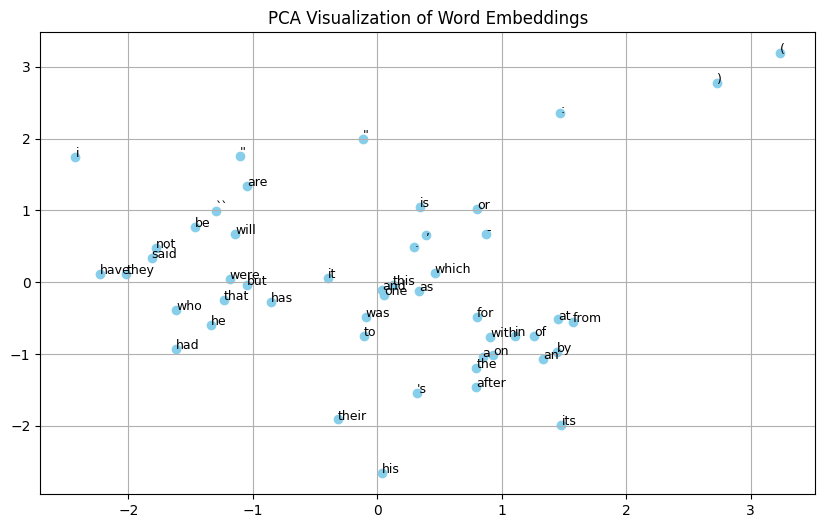

In [16]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Choose 50 words
words = list(model.key_to_index.keys())[:50]
word_vectors = np.array([model[word] for word in words])

# --- PCA Visualization ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='skyblue')

for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), fontsize=9)
plt.title('PCA Visualization of Word Embeddings')
plt.grid(True)
plt.savefig("pca_plot.png", dpi=300, bbox_inches='tight')



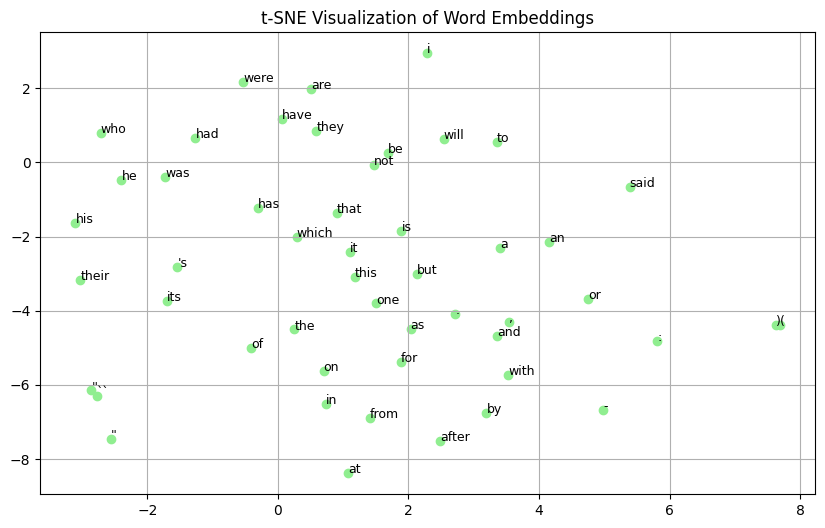

In [31]:
# --- t-SNE Visualization ---
tsne = TSNE(n_components=2, random_state=42, perplexity=15, n_iter=1000)
tsne_result = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='lightgreen')

for i, word in enumerate(words):
    plt.annotate(word, xy=(tsne_result[i, 0], tsne_result[i, 1]), fontsize=9)
plt.title('t-SNE Visualization of Word Embeddings')
plt.grid(True)
plt.savefig("tsne_plot.png", dpi=300, bbox_inches='tight')


# June 9 – Sentence Embeddings

## 🔄 Sentence Embeddings

Unlike word embeddings, **sentence embeddings** capture the meaning of an entire sentence.

There are two common approaches:

---

### ✅ 1. Mean Pooling of Word Vectors

- Average the embeddings of each word in the sentence.
- Simple but effective for many tasks.


In [18]:
def get_mean_embedding(sentence, model):
    words = sentence.lower().split()
    valid_vectors = [model[word] for word in words if word in model]
    
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

sentence1 = "India is a diverse country"
sentence2 = "Canada is a multicultural nation"

vec1 = get_mean_embedding(sentence1, model)
vec2 = get_mean_embedding(sentence2, model)

similarity = cosine_similarity([vec1], [vec2])[0][0]
print(f"Cosine similarity between the two sentences: {similarity:.4f}")


Cosine similarity between the two sentences: 0.9410


### ✅ 2. Using BERT [CLS] Token

BERT (Bidirectional Encoder Representations from Transformers) outputs contextual embeddings. The `[CLS]` token's embedding represents the **entire sentence**.

We'll use `bert-base-uncased` via HuggingFace's Transformers.


In [19]:
# !pip install transformers sentence-transformers

from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')

def get_cls_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model_bert(**inputs)
    cls_embedding = outputs.last_hidden_state[0, 0, :]  # CLS token
    return cls_embedding.numpy()

sent1 = "India is a diverse country"
sent2 = "Canada is a multicultural nation"

vec1 = get_cls_embedding(sent1)
vec2 = get_cls_embedding(sent2)

similarity = cosine_similarity([vec1], [vec2])[0][0]
print(f"BERT [CLS] similarity between the two sentences: {similarity:.4f}")


BERT [CLS] similarity between the two sentences: 0.9502


# June 10 – Sparse vs Dense Features

## 🔍 Sparse vs Dense Representations in NLP

Text must be converted into numeric form before feeding into ML models. Two main representations are:

---

### 1. Sparse Representation (TF-IDF)

- Each document is represented as a **high-dimensional sparse vector**.
- Size of vector = Vocabulary size.
- TF-IDF = Term Frequency × Inverse Document Frequency.

Advantage: Easy to compute, interpretable.  
Disadvantage: Doesn't capture word semantics or context.

---

### 2. Dense Representation (Word2Vec Mean)

- Each word is mapped to a dense, low-dimensional vector (e.g., 100d).
- A sentence is represented as the **mean of its word vectors**.

Advantage: Captures meaning better.  
Disadvantage: Loses word order, and naive averaging can be weak.


In [20]:
# Load dataset
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups(subset='all', download_if_missing=True)
from sklearn.model_selection import train_test_split
import numpy as np

try:
    categories = ['rec.autos', 'talk.religion.misc']
    data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Dataset loaded successfully.")
except Exception as e:
    print("Error loading dataset:", e)

Dataset loaded successfully.


### 🧪 Step 1: TF-IDF Vectorization + Logistic Regression


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

start = time.time()
clf_tfidf = LogisticRegression(max_iter=1000)
clf_tfidf.fit(X_train_tfidf, y_train)
acc_tfidf = accuracy_score(y_test, clf_tfidf.predict(X_test_tfidf))
print(f"TF-IDF Accuracy: {acc_tfidf:.4f}, Time: {time.time() - start:.2f}s")


TF-IDF Accuracy: 0.8981, Time: 0.01s


### 🧪 Step 2: Word2Vec Mean Embedding + Logistic Regression


In [22]:
from gensim.downloader import load
glove = load("glove-wiki-gigaword-100")

def get_mean_vector(sentence, model):
    words = sentence.lower().split()
    vecs = [model[word] for word in words if word in model]
    return np.mean(vecs, axis=0) if vecs else np.zeros(model.vector_size)

X_train_vec = np.array([get_mean_vector(text, glove) for text in X_train])
X_test_vec = np.array([get_mean_vector(text, glove) for text in X_test])


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_vec)
X_test_scaled = scaler.transform(X_test_vec)

start = time.time()
clf_w2v = LogisticRegression(max_iter=1000)
clf_w2v.fit(X_train_scaled, y_train)
acc_w2v = accuracy_score(y_test, clf_w2v.predict(X_test_scaled))
print(f"Word2Vec Mean Accuracy: {acc_w2v:.4f}, Time: {time.time() - start:.2f}s")


Word2Vec Mean Accuracy: 0.9228, Time: 0.04s


# June 11 – Word2Vec vs GloVe

## 🔁 Word2Vec vs GloVe

| Method    | Idea                                        |
|-----------|---------------------------------------------|
| Word2Vec  | Trained to predict context words (local)    |
| GloVe     | Factorizes word co-occurrence matrix (global) |

Both generate **dense vectors**, but differ in training philosophy.

Let’s train Word2Vec from scratch and compare with GloVe.


In [24]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

corpus = [word_tokenize(doc.lower()) for doc in X_train]


[nltk_data] Downloading package punkt to C:\Users\Asus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
from gensim.models import Word2Vec

start = time.time()
w2v_model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=2, workers=2)
print(f"Training Word2Vec took {time.time() - start:.2f} seconds")


Training Word2Vec took 0.78 seconds


### 🔍 Vocab Size Comparison


In [26]:
print(f"GloVe vocab size: {len(glove)}")
print(f"Trained Word2Vec vocab size: {len(w2v_model.wv)}")


GloVe vocab size: 400000
Trained Word2Vec vocab size: 8598


### 🧪 Evaluate Word2Vec (Trained) on Classification Task


In [27]:
def get_trained_vec(sentence, model):
    words = sentence.lower().split()
    vecs = [model[word] for word in words if word in model]
    return np.mean(vecs, axis=0) if vecs else np.zeros(model.vector_size)

X_train_vec2 = np.array([get_trained_vec(text, w2v_model.wv) for text in X_train])
X_test_vec2 = np.array([get_trained_vec(text, w2v_model.wv) for text in X_test])

X_train_vec2 = scaler.fit_transform(X_train_vec2)
X_test_vec2 = scaler.transform(X_test_vec2)

clf_w2v2 = LogisticRegression(max_iter=1000)
clf_w2v2.fit(X_train_vec2, y_train)
acc_w2v2 = accuracy_score(y_test, clf_w2v2.predict(X_test_vec2))
print(f"Word2Vec (trained) Accuracy: {acc_w2v2:.4f}")


Word2Vec (trained) Accuracy: 0.8302


# June 12 (Thu) – 🧠 Sentence Transformers

## 🧠 Sentence Embeddings using Sentence Transformers

Sentence-BERT models are pretrained using **Siamese networks** to generate meaningful sentence vectors.

We’ll use:
- `all-MiniLM-L6-v2`: Lightweight, fast, and high-performing model.

Goal: Generate sentence embeddings and use them in classification.


In [28]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer

model_sbert = SentenceTransformer("all-MiniLM-L6-v2")

start = time.time()
X_train_sbert = model_sbert.encode(X_train, convert_to_tensor=False)
X_test_sbert = model_sbert.encode(X_test, convert_to_tensor=False)
print(f"SentenceTransformer encoding time: {time.time() - start:.2f}s")



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


SentenceTransformer encoding time: 36.31s


In [29]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import numpy as np

categories = ['rec.autos', 'talk.religion.misc']
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

X, y = data.data, data.target

# ✅ Stratified split to keep class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

import numpy as np
print("Train label distribution:", np.bincount(y_train))
print("Test label distribution:", np.bincount(y_test))



Train label distribution: [792 502]
Test label distribution: [198 126]


In [30]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_sbert = SentenceTransformer("all-MiniLM-L6-v2")
X_train_sbert = model_sbert.encode(X_train, convert_to_tensor=False)
X_test_sbert = model_sbert.encode(X_test, convert_to_tensor=False)

clf_sbert = LogisticRegression(max_iter=1000)
clf_sbert.fit(X_train_sbert, y_train)
acc_sbert = accuracy_score(y_test, clf_sbert.predict(X_test_sbert))
print(f"Sentence-BERT Accuracy: {acc_sbert:.4f}")


Sentence-BERT Accuracy: 0.9444


## 📊 Summary of Results

| Representation          | Accuracy | Training Time | Notes                           |
|-------------------------|----------|----------------|----------------------------------|
| TF-IDF (Sparse)         | 0.898    | 0.02           | Interpretable, fast              |
| GloVe (Mean Embedding)  | 0.922    | 0.04           | Dense, pretrained                |
| Word2Vec (Trained)      | 0.8302   | 0.76           | Custom, smaller vocab            |
| Sentence-BERT           | 0.9444   | 124.13         | Contextual, best quality         |
